# Project Description


Detecting Pediatric Acute Lymphoblastic Leukemia using Computer Vision

https://omdena.com/chapter-challenges/detecting-pediatric-acute-lymphoblastic-leukemia-using-computer-vision/

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Required Packages

In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.8 MB/s eta 0:00:00


# Imports

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import optuna




# Load Data - Batch 1

In [4]:
!unzip '/content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_1.zip'

Archive:  /content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_test_pickle/batch_1.zip
  inflating: batch_1/test_data.pickle  
  inflating: batch_1/train_data.pickle  


In [5]:
df_train = pd.read_pickle('./batch_1/train_data.pickle')
df_test = pd.read_pickle('./batch_1/test_data.pickle')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Columns: 4609 entries, 0 to label
dtypes: float32(4608), int64(1)
memory usage: 150.0 MB


In [7]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.579951,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.166770,0.0,0.0,...,0.747650,0.245581,0.030024,0.174167,0.540283,0.0,0.0,0.353232,0.0,1
1,0.578539,0.0,0.059236,0.000000,0.000000,0.0,0.0,0.199044,0.0,0.0,...,0.668872,0.162014,0.000000,0.127915,0.493748,0.0,0.0,0.275539,0.0,1
2,0.087414,0.0,0.695490,0.436274,0.000000,0.0,0.0,0.103897,0.0,0.0,...,0.492471,0.082775,0.000000,0.112004,0.438546,0.0,0.0,0.096754,0.0,0
3,0.329184,0.0,0.000000,0.029938,0.024057,0.0,0.0,0.036206,0.0,0.0,...,0.654933,0.337055,0.000000,0.000000,0.346229,0.0,0.0,0.317232,0.0,0
4,0.053473,0.0,0.000000,0.184720,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.732901,0.191005,0.000000,0.049176,0.545555,0.0,0.0,0.281541,0.0,0


In [8]:
df_train.shape

(8528, 4609)

In [9]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.353652,0.0,0.000000,0.305203,0.0377,0.0,0.0,0.000000,0.0,0.0,...,0.728745,0.127965,0.0,0.000000,0.303071,0.0,0.0,0.028939,0.0,0
1,0.695522,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.104255,0.0,0.0,...,0.730706,0.220946,0.0,0.016399,0.487663,0.0,0.0,0.354154,0.0,1
2,0.279904,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.160006,0.0,0.0,...,0.676915,0.199919,0.0,0.062777,0.000000,0.0,0.0,0.000000,0.0,0
3,0.098326,0.0,0.000000,0.000000,0.0000,0.0,0.0,0.172469,0.0,0.0,...,0.945252,0.119779,0.0,0.021867,0.614726,0.0,0.0,0.154880,0.0,0
4,0.270445,0.0,0.769334,0.022462,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.538275,0.242577,0.0,0.014566,0.438992,0.0,0.0,0.191071,0.0,0


In [10]:
df_test.shape

(2133, 4609)

# Create X and y Data to Feed ML Models

In [11]:
X_train = np.array(df_train.iloc[:,:-1].copy())
y_train = np.array(df_train['label'].copy())

In [12]:
(X_train.shape, y_train.shape)

((8528, 4608), (8528,))

In [13]:
X_test = np.array(df_test.iloc[:,:-1].copy())
y_test = np.array(df_test['label'].copy())

In [14]:
(X_test.shape, y_test.shape)

((2133, 4608), (2133,))

# Classification - Logistic Regression

In [15]:
clf_lreg = LogisticRegression(max_iter=1000000).fit(X_train, y_train)
y_pred = clf_lreg.predict(X_test)

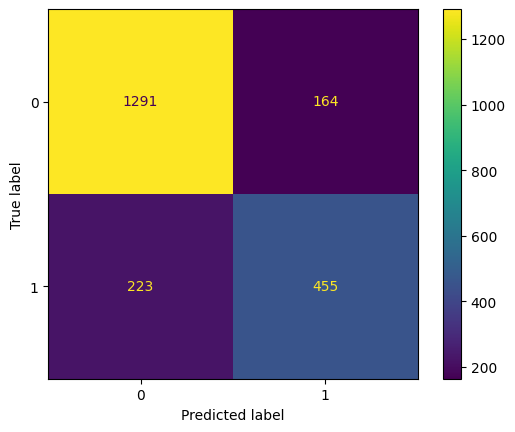

In [16]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
print(classification_report(y_train, clf_lreg.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      5817
           1       0.89      0.78      0.83      2711

    accuracy                           0.90      8528
   macro avg       0.89      0.87      0.88      8528
weighted avg       0.90      0.90      0.90      8528



In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1455
           1       0.74      0.67      0.70       678

    accuracy                           0.82      2133
   macro avg       0.79      0.78      0.79      2133
weighted avg       0.82      0.82      0.82      2133



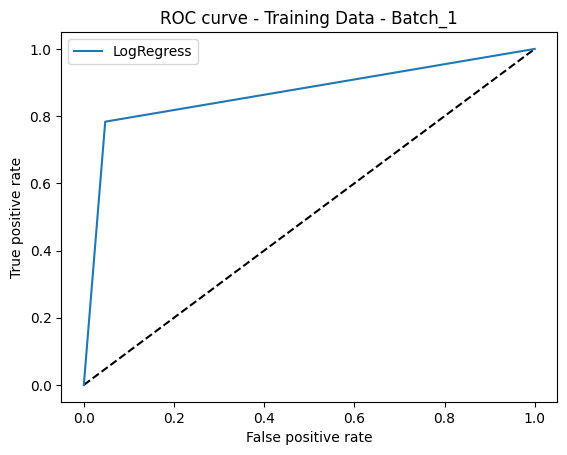

In [19]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_lreg.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_1')
plt.legend(loc='best')
plt.show()

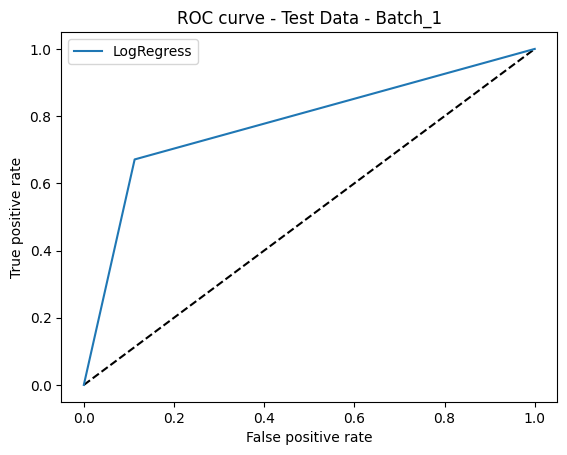

In [20]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_lreg.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LogRegress')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_1')
plt.legend(loc='best')
plt.show()

# Classification - Random Forest

In [21]:
clf_RF = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [22]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

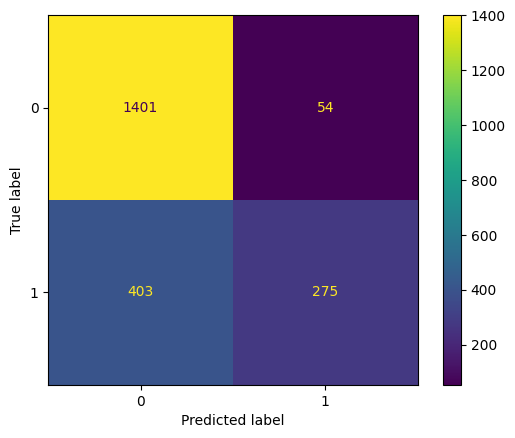

In [23]:
y_pred = clf_RF.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [24]:
print(classification_report(y_train, clf_RF.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5817
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      8528
   macro avg       1.00      1.00      1.00      8528
weighted avg       1.00      1.00      1.00      8528



In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1455
           1       0.84      0.41      0.55       678

    accuracy                           0.79      2133
   macro avg       0.81      0.68      0.70      2133
weighted avg       0.80      0.79      0.76      2133



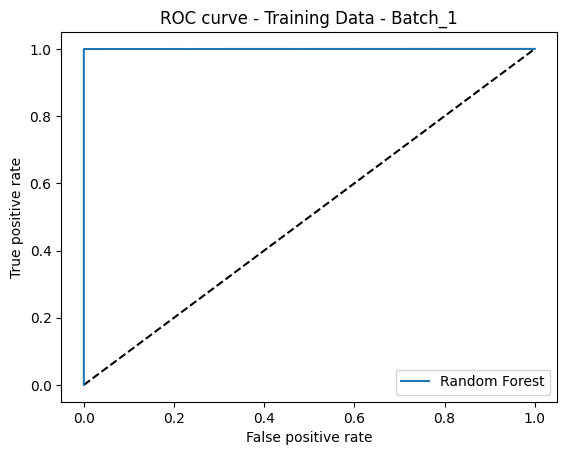

In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_train, clf_RF.predict(X_train))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Training Data - Batch_1')
plt.legend(loc='best')
plt.show()

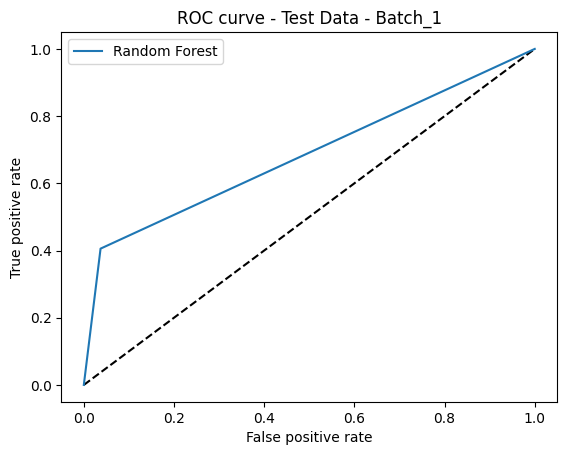

In [27]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_RF.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_1')
plt.legend(loc='best')
plt.show()

# Classification - XGBoost

In [28]:
clf_xgb = XGBClassifier(use_label_encoder=False,eval_metric='logloss',max_depth=50,n_estimators=50,random_state=2023)
clf_xgb.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=2023, ...)

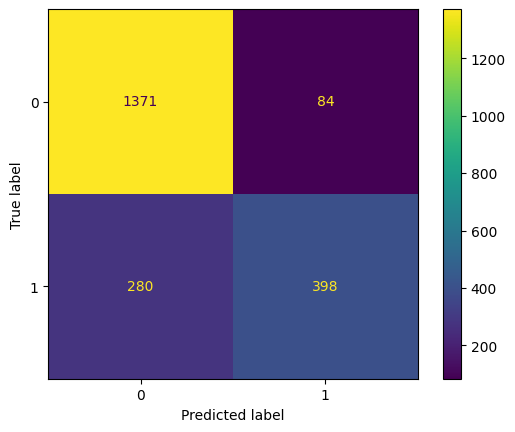

In [29]:
y_pred = clf_xgb.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [30]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5817
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      8528
   macro avg       1.00      1.00      1.00      8528
weighted avg       1.00      1.00      1.00      8528



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1455
           1       0.83      0.59      0.69       678

    accuracy                           0.83      2133
   macro avg       0.83      0.76      0.78      2133
weighted avg       0.83      0.83      0.82      2133



# Hyperparameter Tuning - Optuna


https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407


## Objective Function for Optuna - XGBoost

In [32]:
import xgboost as xgb

In [33]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    param = {
        'n_estimators'      : trial.suggest_int('n_estimators', 50, 500),
        'max_depth'         : trial.suggest_int('max_depth', 50, 500),
        'learning_rate'     : trial.suggest_float('learning_rate', 0.001, 1),
        'verbosity'         : 1,
        'random_state'      : 42,
        'extra_trees'       : True,
        "objective"         : "binary:logistic",
        "eval_metric"       : "auc",
        "booster"           : trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda"            : trial.suggest_float("lambda", 1e-8, 1.0),
        "alpha"             : trial.suggest_float("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

## Run Optuna

In [34]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=1000)

[I 2023-04-04 22:33:36,319] A new study created in memory with name: no-name-caf455dc-09fb-4801-8c56-4c35836bcfde


[22:33:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.70948
[1]	validation-auc:0.74291
[2]	validation-auc:0.76581
[3]	validation-auc:0.78345
[4]	validation-auc:0.79259
[5]	validation-auc:0.80229
[6]	validation-auc:0.80722
[7]	validation-auc:0.81384
[8]	validation-auc:0.81968
[9]	validation-auc:0.82482


[I 2023-04-04 22:33:57,697] Trial 0 finished with value: 0.7955930614158462 and parameters: {'n_estimators': 281, 'max_depth': 416, 'learning_rate': 0.44165006954745717, 'booster': 'gbtree', 'lambda': 0.3614432859011222, 'alpha': 0.9760724973816748, 'eta': 0.6698230690621171, 'gamma': 0.2837867421330557, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.7955930614158462.


[22:33:58] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.56189
[1]	validation-auc:0.56217
[2]	validation-auc:0.56257
[3]	validation-auc:0.56262
[4]	validation-auc:0.56262
[5]	validation-auc:0.56262
[6]	validation-auc:0.56265
[7]	validation-auc:0.56263
[8]	validation-auc:0.56262
[9]	validation-auc:0.56262


[I 2023-04-04 22:33:58,653] Trial 1 finished with value: 0.6821378340365682 and parameters: {'n_estimators': 185, 'max_depth': 166, 'learning_rate': 0.3586542646502114, 'booster': 'gblinear', 'lambda': 0.9120960301703501, 'alpha': 0.4101242753308191}. Best is trial 0 with value: 0.7955930614158462.


[22:33:59] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.70912
[1]	validation-auc:0.74982
[2]	validation-auc:0.76601
[3]	validation-auc:0.77605
[4]	validation-auc:0.78630
[5]	validation-auc:0.80160
[6]	validation-auc:0.80943
[7]	validation-auc:0.81364
[8]	validation-auc:0.81800
[9]	validation-auc:0.82105


[I 2023-04-04 22:34:22,107] Trial 2 finished with value: 0.7927801218940459 and parameters: {'n_estimators': 158, 'max_depth': 455, 'learning_rate': 0.13989673240970021, 'booster': 'dart', 'lambda': 0.3393386480556857, 'alpha': 0.9756596021221625, 'eta': 0.5420917295583942, 'gamma': 0.34144607585601855, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.12520396379598395, 'skip_drop': 0.996575508063658}. Best is trial 0 with value: 0.7955930614158462.


[22:34:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73028
[1]	validation-auc:0.75693
[2]	validation-auc:0.77901
[3]	validation-auc:0.79105
[4]	validation-auc:0.80055
[5]	validation-auc:0.81141
[6]	validation-auc:0.82181
[7]	validation-auc:0.82442
[8]	validation-auc:0.82603
[9]	validation-auc:0.82945


[I 2023-04-04 22:34:40,857] Trial 3 finished with value: 0.8012189404594467 and parameters: {'n_estimators': 183, 'max_depth': 147, 'learning_rate': 0.4288167132402371, 'booster': 'dart', 'lambda': 0.15706362726505388, 'alpha': 0.46094535648271506, 'eta': 0.11086093605778856, 'gamma': 0.12632314516683338, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.33061145096832234, 'skip_drop': 0.8855946689370332}. Best is trial 3 with value: 0.8012189404594467.


[22:34:41] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71998
[1]	validation-auc:0.71998
[2]	validation-auc:0.74797
[3]	validation-auc:0.76938
[4]	validation-auc:0.78612
[5]	validation-auc:0.79696
[6]	validation-auc:0.78241
[7]	validation-auc:0.79646
[8]	validation-auc:0.80534
[9]	validation-auc:0.81249


[I 2023-04-04 22:35:02,456] Trial 4 finished with value: 0.7754336615096109 and parameters: {'n_estimators': 120, 'max_depth': 219, 'learning_rate': 0.2780743464026623, 'booster': 'dart', 'lambda': 0.9854145012893446, 'alpha': 0.3528369454437169, 'eta': 0.17755413536835757, 'gamma': 0.8352244841072408, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.8172212518666853, 'skip_drop': 0.5090377132939862}. Best is trial 3 with value: 0.8012189404594467.


[22:35:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71307
[1]	validation-auc:0.72403


[I 2023-04-04 22:35:08,074] Trial 5 pruned. Trial was pruned at iteration 1.


[22:35:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71273


[I 2023-04-04 22:35:13,187] Trial 6 pruned. Trial was pruned at iteration 1.


[22:35:13] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72072


[I 2023-04-04 22:35:18,131] Trial 7 pruned. Trial was pruned at iteration 1.


[22:35:18] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:35:21,061] Trial 8 pruned. Trial was pruned at iteration 0.


[22:35:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73310
[1]	validation-auc:0.74638
[2]	validation-auc:0.76701


[I 2023-04-04 22:35:29,963] Trial 9 pruned. Trial was pruned at iteration 3.


[22:35:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.53203


[I 2023-04-04 22:35:30,787] Trial 10 pruned. Trial was pruned at iteration 0.


[22:35:31] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72457
[1]	validation-auc:0.75603
[2]	validation-auc:0.78191
[3]	validation-auc:0.79743
[4]	validation-auc:0.80481
[5]	validation-auc:0.81655
[6]	validation-auc:0.81915
[7]	validation-auc:0.82436
[8]	validation-auc:0.82866
[9]	validation-auc:0.83158


[I 2023-04-04 22:35:47,247] Trial 11 finished with value: 0.7960618846694796 and parameters: {'n_estimators': 336, 'max_depth': 335, 'learning_rate': 0.5955164465668773, 'booster': 'gbtree', 'lambda': 0.12747213034650082, 'alpha': 0.6435446779109856, 'eta': 0.38460484767967296, 'gamma': 0.05362401841676362, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.8012189404594467.


[22:35:47] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72245
[1]	validation-auc:0.74679
[2]	validation-auc:0.76764
[3]	validation-auc:0.78310
[4]	validation-auc:0.79398
[5]	validation-auc:0.80382
[6]	validation-auc:0.80757


[I 2023-04-04 22:36:00,275] Trial 12 pruned. Trial was pruned at iteration 6.


[22:36:00] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72423


[I 2023-04-04 22:36:05,688] Trial 13 pruned. Trial was pruned at iteration 1.


[22:36:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 22:36:06,584] Trial 14 pruned. Trial was pruned at iteration 0.


[22:36:07] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72575
[1]	validation-auc:0.75315
[2]	validation-auc:0.77579
[3]	validation-auc:0.79079
[4]	validation-auc:0.80011
[5]	validation-auc:0.81221
[6]	validation-auc:0.82117
[7]	validation-auc:0.82677
[8]	validation-auc:0.83059
[9]	validation-auc:0.83083


[I 2023-04-04 22:36:25,075] Trial 15 finished with value: 0.796530707923113 and parameters: {'n_estimators': 337, 'max_depth': 244, 'learning_rate': 0.2671302889723164, 'booster': 'gbtree', 'lambda': 0.21054633198261097, 'alpha': 0.281441416013912, 'eta': 0.31235081379548746, 'gamma': 0.4469833755242736, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.8012189404594467.


[22:36:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72819


[I 2023-04-04 22:36:29,792] Trial 16 pruned. Trial was pruned at iteration 1.


[22:36:30] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72748
[1]	validation-auc:0.75950
[2]	validation-auc:0.77883
[3]	validation-auc:0.79698
[4]	validation-auc:0.80419
[5]	validation-auc:0.81360
[6]	validation-auc:0.81945
[7]	validation-auc:0.82485
[8]	validation-auc:0.82896
[9]	validation-auc:0.83219


[I 2023-04-04 22:36:47,591] Trial 17 finished with value: 0.7960618846694796 and parameters: {'n_estimators': 331, 'max_depth': 242, 'learning_rate': 0.21258769678702338, 'booster': 'gbtree', 'lambda': 0.036426401239357115, 'alpha': 0.20670157702344827, 'eta': 0.1774972997425715, 'gamma': 0.5077276690376042, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.8012189404594467.


[22:36:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73188


[I 2023-04-04 22:36:54,318] Trial 18 pruned. Trial was pruned at iteration 1.


[22:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.55996


[I 2023-04-04 22:36:55,054] Trial 19 pruned. Trial was pruned at iteration 0.


[22:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72701
[1]	validation-auc:0.74146


[I 2023-04-04 22:36:59,618] Trial 20 pruned. Trial was pruned at iteration 1.


[22:37:00] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72841
[1]	validation-auc:0.76091
[2]	validation-auc:0.77378


[I 2023-04-04 22:37:09,077] Trial 21 pruned. Trial was pruned at iteration 3.


[22:37:09] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72874
[1]	validation-auc:0.75682
[2]	validation-auc:0.78334
[3]	validation-auc:0.80443
[4]	validation-auc:0.81150
[5]	validation-auc:0.81684
[6]	validation-auc:0.82414
[7]	validation-auc:0.82822
[8]	validation-auc:0.83430
[9]	validation-auc:0.83710


[I 2023-04-04 22:37:26,501] Trial 22 finished with value: 0.7979371776840132 and parameters: {'n_estimators': 437, 'max_depth': 362, 'learning_rate': 0.4218084977065004, 'booster': 'gbtree', 'lambda': 0.09857349780042837, 'alpha': 0.5015341420870143, 'eta': 0.29503136343953834, 'gamma': 0.09836790677250185, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.8012189404594467.


[22:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72919
[1]	validation-auc:0.74166


[I 2023-04-04 22:37:31,301] Trial 23 pruned. Trial was pruned at iteration 1.


[22:37:31] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72966
[1]	validation-auc:0.74718


[I 2023-04-04 22:37:38,433] Trial 24 pruned. Trial was pruned at iteration 1.


[22:37:38] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72928
[1]	validation-auc:0.74794


[I 2023-04-04 22:37:43,269] Trial 25 pruned. Trial was pruned at iteration 1.


[22:37:43] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72839
[1]	validation-auc:0.74962


[I 2023-04-04 22:37:48,390] Trial 26 pruned. Trial was pruned at iteration 1.


[22:37:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72698
[1]	validation-auc:0.76016
[2]	validation-auc:0.77960
[3]	validation-auc:0.79387
[4]	validation-auc:0.79888


[I 2023-04-04 22:37:58,648] Trial 27 pruned. Trial was pruned at iteration 4.


[22:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72282


[I 2023-04-04 22:38:01,596] Trial 28 pruned. Trial was pruned at iteration 0.


[22:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 22:38:02,541] Trial 29 pruned. Trial was pruned at iteration 0.


[22:38:03] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73071


[I 2023-04-04 22:38:08,480] Trial 30 pruned. Trial was pruned at iteration 1.


[22:38:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72318


[I 2023-04-04 22:38:11,535] Trial 31 pruned. Trial was pruned at iteration 0.


[22:38:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72756
[1]	validation-auc:0.75522


[I 2023-04-04 22:38:19,836] Trial 32 pruned. Trial was pruned at iteration 2.


[22:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73035
[1]	validation-auc:0.75117


[I 2023-04-04 22:38:24,644] Trial 33 pruned. Trial was pruned at iteration 1.


[22:38:25] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71642


[I 2023-04-04 22:38:27,439] Trial 34 pruned. Trial was pruned at iteration 0.


[22:38:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72688


[I 2023-04-04 22:38:34,100] Trial 35 pruned. Trial was pruned at iteration 1.


[22:38:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72541


[I 2023-04-04 22:38:39,213] Trial 36 pruned. Trial was pruned at iteration 1.


[22:38:39] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73061


[I 2023-04-04 22:38:43,779] Trial 37 pruned. Trial was pruned at iteration 1.


[22:38:44] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.55006


[I 2023-04-04 22:38:44,472] Trial 38 pruned. Trial was pruned at iteration 0.


[22:38:44] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73035


[I 2023-04-04 22:38:50,756] Trial 39 pruned. Trial was pruned at iteration 1.


[22:38:51] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:38:53,531] Trial 40 pruned. Trial was pruned at iteration 0.


[22:38:53] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73180
[1]	validation-auc:0.75498


[I 2023-04-04 22:39:00,590] Trial 41 pruned. Trial was pruned at iteration 2.


[22:39:01] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72742


[I 2023-04-04 22:39:05,789] Trial 42 pruned. Trial was pruned at iteration 1.


[22:39:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72927
[1]	validation-auc:0.75209


[I 2023-04-04 22:39:10,472] Trial 43 pruned. Trial was pruned at iteration 1.


[22:39:10] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72652
[1]	validation-auc:0.75845
[2]	validation-auc:0.77761
[3]	validation-auc:0.79373
[4]	validation-auc:0.80612
[5]	validation-auc:0.81722
[6]	validation-auc:0.82405
[7]	validation-auc:0.82764
[8]	validation-auc:0.83276
[9]	validation-auc:0.83442


[I 2023-04-04 22:39:27,605] Trial 44 finished with value: 0.8007501172058135 and parameters: {'n_estimators': 279, 'max_depth': 209, 'learning_rate': 0.2516688140093374, 'booster': 'gbtree', 'lambda': 0.11027621150062095, 'alpha': 0.19523400190245105, 'eta': 0.3083966234386235, 'gamma': 0.4676030108799968, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.8012189404594467.


[22:39:28] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72805
[1]	validation-auc:0.75685
[2]	validation-auc:0.77226


[I 2023-04-04 22:39:35,969] Trial 45 pruned. Trial was pruned at iteration 2.


[22:39:36] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72643
[1]	validation-auc:0.73994


[I 2023-04-04 22:39:40,446] Trial 46 pruned. Trial was pruned at iteration 1.


[22:39:40] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72569
[1]	validation-auc:0.74962


[I 2023-04-04 22:39:45,040] Trial 47 pruned. Trial was pruned at iteration 1.


[22:39:45] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 22:39:45,917] Trial 48 pruned. Trial was pruned at iteration 0.


[22:39:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72883


[I 2023-04-04 22:39:51,006] Trial 49 pruned. Trial was pruned at iteration 1.


[22:39:51] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72912


[I 2023-04-04 22:39:55,554] Trial 50 pruned. Trial was pruned at iteration 1.


[22:39:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72727
[1]	validation-auc:0.75991
[2]	validation-auc:0.77523


[I 2023-04-04 22:40:03,704] Trial 51 pruned. Trial was pruned at iteration 2.


[22:40:04] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:40:06,416] Trial 52 pruned. Trial was pruned at iteration 0.


[22:40:06] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72844


[I 2023-04-04 22:40:11,188] Trial 53 pruned. Trial was pruned at iteration 1.


[22:40:11] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73081


[I 2023-04-04 22:40:17,388] Trial 54 pruned. Trial was pruned at iteration 1.


[22:40:17] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72720


[I 2023-04-04 22:40:21,949] Trial 55 pruned. Trial was pruned at iteration 1.


[22:40:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72810


[I 2023-04-04 22:40:26,660] Trial 56 pruned. Trial was pruned at iteration 1.


[22:40:27] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72864


[I 2023-04-04 22:40:33,406] Trial 57 pruned. Trial was pruned at iteration 1.


[22:40:33] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.59204


[I 2023-04-04 22:40:34,103] Trial 58 pruned. Trial was pruned at iteration 0.


[22:40:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72261


[I 2023-04-04 22:40:37,029] Trial 59 pruned. Trial was pruned at iteration 0.


[22:40:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72893
[1]	validation-auc:0.74831


[I 2023-04-04 22:40:41,740] Trial 60 pruned. Trial was pruned at iteration 1.


[22:40:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71804


[I 2023-04-04 22:40:46,435] Trial 61 pruned. Trial was pruned at iteration 0.


[22:40:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71524


[I 2023-04-04 22:40:49,211] Trial 62 pruned. Trial was pruned at iteration 0.


[22:40:49] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:40:52,053] Trial 63 pruned. Trial was pruned at iteration 0.


[22:40:52] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72650


[I 2023-04-04 22:40:56,866] Trial 64 pruned. Trial was pruned at iteration 1.


[22:40:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:41:01,042] Trial 65 pruned. Trial was pruned at iteration 0.


[22:41:01] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:41:03,961] Trial 66 pruned. Trial was pruned at iteration 0.


[22:41:04] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73103


[I 2023-04-04 22:41:08,825] Trial 67 pruned. Trial was pruned at iteration 1.


[22:41:09] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72491


[I 2023-04-04 22:41:12,308] Trial 68 pruned. Trial was pruned at iteration 0.


[22:41:12] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.56458


[I 2023-04-04 22:41:13,166] Trial 69 pruned. Trial was pruned at iteration 0.


[22:41:13] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72946
[1]	validation-auc:0.74933


[I 2023-04-04 22:41:18,068] Trial 70 pruned. Trial was pruned at iteration 1.


[22:41:18] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72164


[I 2023-04-04 22:41:20,980] Trial 71 pruned. Trial was pruned at iteration 0.


[22:41:21] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72344


[I 2023-04-04 22:41:23,947] Trial 72 pruned. Trial was pruned at iteration 0.


[22:41:24] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:41:28,606] Trial 73 pruned. Trial was pruned at iteration 0.


[22:41:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71516


[I 2023-04-04 22:41:31,454] Trial 74 pruned. Trial was pruned at iteration 0.


[22:41:31] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71372


[I 2023-04-04 22:41:34,254] Trial 75 pruned. Trial was pruned at iteration 0.


[22:41:34] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:41:37,004] Trial 76 pruned. Trial was pruned at iteration 0.


[22:41:37] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72510


[I 2023-04-04 22:41:39,990] Trial 77 pruned. Trial was pruned at iteration 0.


[22:41:40] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73066
[1]	validation-auc:0.75224


[I 2023-04-04 22:41:45,939] Trial 78 pruned. Trial was pruned at iteration 1.


[22:41:46] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72769


[I 2023-04-04 22:41:50,871] Trial 79 pruned. Trial was pruned at iteration 1.


[22:41:51] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 22:41:51,569] Trial 80 pruned. Trial was pruned at iteration 0.


[22:41:51] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.71997


[I 2023-04-04 22:41:54,567] Trial 81 pruned. Trial was pruned at iteration 0.


[22:41:55] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:41:58,555] Trial 82 pruned. Trial was pruned at iteration 0.


[22:41:59] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73307


[I 2023-04-04 22:42:03,294] Trial 83 pruned. Trial was pruned at iteration 1.


[22:42:03] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72645


[I 2023-04-04 22:42:08,050] Trial 84 pruned. Trial was pruned at iteration 1.


[22:42:08] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.



[I 2023-04-04 22:42:12,745] Trial 85 pruned. Trial was pruned at iteration 0.


[22:42:13] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72879


[I 2023-04-04 22:42:17,531] Trial 86 pruned. Trial was pruned at iteration 1.


[22:42:17] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72921
[1]	validation-auc:0.75306


[I 2023-04-04 22:42:22,254] Trial 87 pruned. Trial was pruned at iteration 1.


[22:42:22] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72789


[I 2023-04-04 22:42:28,945] Trial 88 pruned. Trial was pruned at iteration 1.


[22:42:29] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72662
[1]	validation-auc:0.75647


[I 2023-04-04 22:42:35,319] Trial 89 pruned. Trial was pruned at iteration 2.


[22:42:35] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73136


[I 2023-04-04 22:42:42,125] Trial 90 pruned. Trial was pruned at iteration 1.


[22:42:42] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 22:42:42,999] Trial 91 pruned. Trial was pruned at iteration 0.


[22:42:43] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.56200


[I 2023-04-04 22:42:43,703] Trial 92 pruned. Trial was pruned at iteration 0.


[22:42:44] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.



[I 2023-04-04 22:42:44,396] Trial 93 pruned. Trial was pruned at iteration 0.


[22:42:44] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.56210


[I 2023-04-04 22:42:45,095] Trial 94 pruned. Trial was pruned at iteration 0.


[22:42:45] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72320


[I 2023-04-04 22:42:48,075] Trial 95 pruned. Trial was pruned at iteration 0.


[22:42:48] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "max_depth", "n_estimators" } are not used.

[0]	validation-auc:0.56179


[I 2023-04-04 22:42:48,772] Trial 96 pruned. Trial was pruned at iteration 0.


[22:42:49] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72710
[1]	validation-auc:0.75510
[2]	validation-auc:0.77569


[I 2023-04-04 22:42:56,896] Trial 97 pruned. Trial was pruned at iteration 2.


[22:42:57] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.72795
[1]	validation-auc:0.75442


[I 2023-04-04 22:43:01,791] Trial 98 pruned. Trial was pruned at iteration 1.


[22:43:02] WARNING: ../src/learner.cc:767: 
Parameters: { "extra_trees", "n_estimators" } are not used.

[0]	validation-auc:0.73311
[1]	validation-auc:0.75177


[I 2023-04-04 22:43:06,458] Trial 99 pruned. Trial was pruned at iteration 1.


## Best XGBoster Model from Optuna

In [35]:
study.best_params

{'n_estimators': 183,
 'max_depth': 147,
 'learning_rate': 0.4288167132402371,
 'booster': 'dart',
 'lambda': 0.15706362726505388,
 'alpha': 0.46094535648271506,
 'eta': 0.11086093605778856,
 'gamma': 0.12632314516683338,
 'grow_policy': 'lossguide',
 'sample_type': 'weighted',
 'normalize_type': 'tree',
 'rate_drop': 0.33061145096832234,
 'skip_drop': 0.8855946689370332}

In [36]:
clf_xgb_opt= XGBClassifier(**study.best_params)

In [37]:
clf_xgb_opt.fit(X_train, y_train)

XGBClassifier(alpha=0.46094535648271506, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.11086093605778856,
              eval_metric=None, feature_types=None, gamma=0.12632314516683338,
              gpu_id=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, lambda=0.15706362726505388,
              learning_rate=0.4288167132402371, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=147, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=183, n_jobs=None, ...)

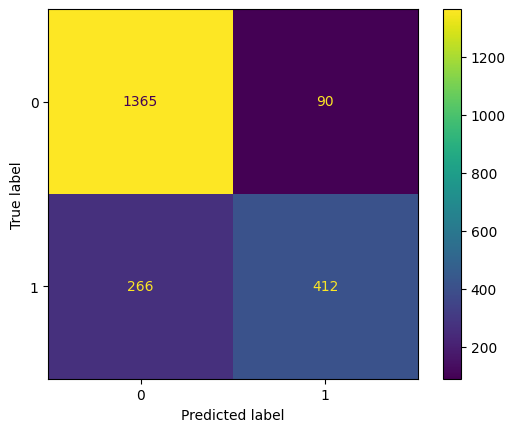

In [38]:
y_pred = clf_xgb_opt.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [39]:
print(classification_report(y_train, clf_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5817
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      8528
   macro avg       1.00      1.00      1.00      8528
weighted avg       1.00      1.00      1.00      8528



In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1455
           1       0.82      0.61      0.70       678

    accuracy                           0.83      2133
   macro avg       0.83      0.77      0.79      2133
weighted avg       0.83      0.83      0.83      2133



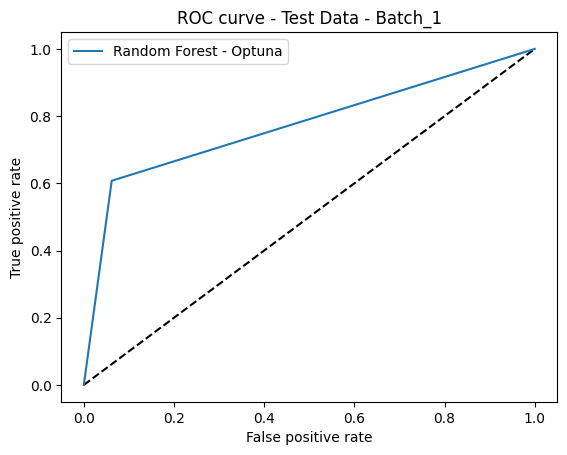

In [41]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_xgb_opt.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest - Optuna')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data - Batch_1')
plt.legend(loc='best')
plt.show()